# INTRODUCTION TO MACHINE LEARNING

Machine Learning is about mathematical algorithms and using a set of statistical  to perform tasks such as concept learning, predictive modelin, clustering, and mining useful patterns. The goal is to improve the learning in such a way that less human interactions or no human interactions are needed. Almost every machine learning algorithm that is used can be treated as an optimization problem. This is about finding parameters that minimize certain objective fucntion like weighted sum of two terms such as a cost function and regularization.

An objective functions is consist of two components which is a regularizer which controls the complexity of the model and the other is the loss, which measures the error of the model on the training data. The regularization parameter defines the balance between the two objectives: to minimize the loss of the training error and to minimize the complexity of the model so that it does not overfit.

When the predictor model fits perfectly on the training examples but fails miserably on the test examples, this is known as overfitting. This frequently occurs when the model is too complex to fit the data correctly (too many parameters) or when there is insufficient data to accurately estimate the parameters. Overfitting is common when the model complexity to training set size ratio is too high.

### The Challenge of Machine Learning

The goal is to teach a computer how to recognize complex patterns automatically and make as informed decisions as possible. The entire learning process requires a dataset, as follows:
1. Training set: This is the knowledge base that the machine-learning algorithm uses to fit the parameters. During this phase, we'll use the training set to figure out the best weights to use, as well as the back-prop rule and all the other parameters to set before the learning process starts (hyperparameters).


2. Validation set: This is a collection of examples that can be used to fine-tune the parameters of a machine learning model. The validation set could be used to find the optimal number of hidden units or a stopping point for the back-propagation algorithm, for example. It's also known as the development set or dev set by some Machine Learning practitioners.


3. Test set: This is used for model inferencing, which is the process of evaluating a model's performance on unknown data. We don't need to tune the model any further after evaluating it on the test set.

# Machine Learning Fundamental

#### Cross Validation

1. Estimate the parameters for the machine learning methods.
2. Evaluate how well the machine learning methods work.

To estimate the parameters for the machine learning methods, we need to train the machine learning methods and to evaluate how well the machine learning methods work, we need to test the machine learning methods

###### Note

A terrible approach would be to use all of the data to estimate the parameters (i.e Train the algorithm). The reason is because there won't be enough data left to test the method. Reusing the same data for both training and testing is a bad idea because we need to know how the method will work on data it wasn't trained on.

A slightly better idea would be to use the first 75% of the data for training and the last 25% of the data for testing. Then, methods is compared by seeing how well each one catergorized the test data.

#### The Confusion Matrix

The rows in a confusion Matrix correspond to what the machine learning algorithm predicted

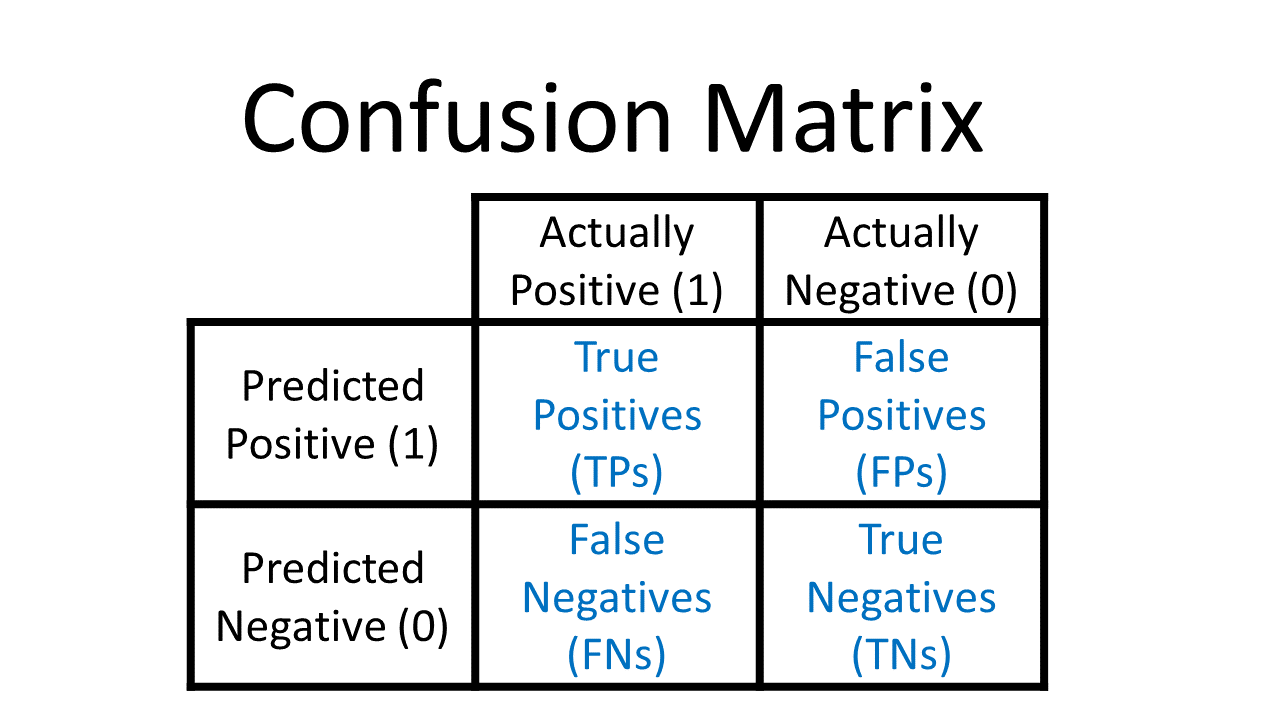

Reference: https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/

#### Sensitivity and specificity

Below is the formula used to calculate sensitivity and specificity.

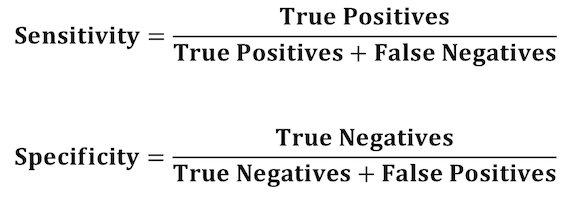
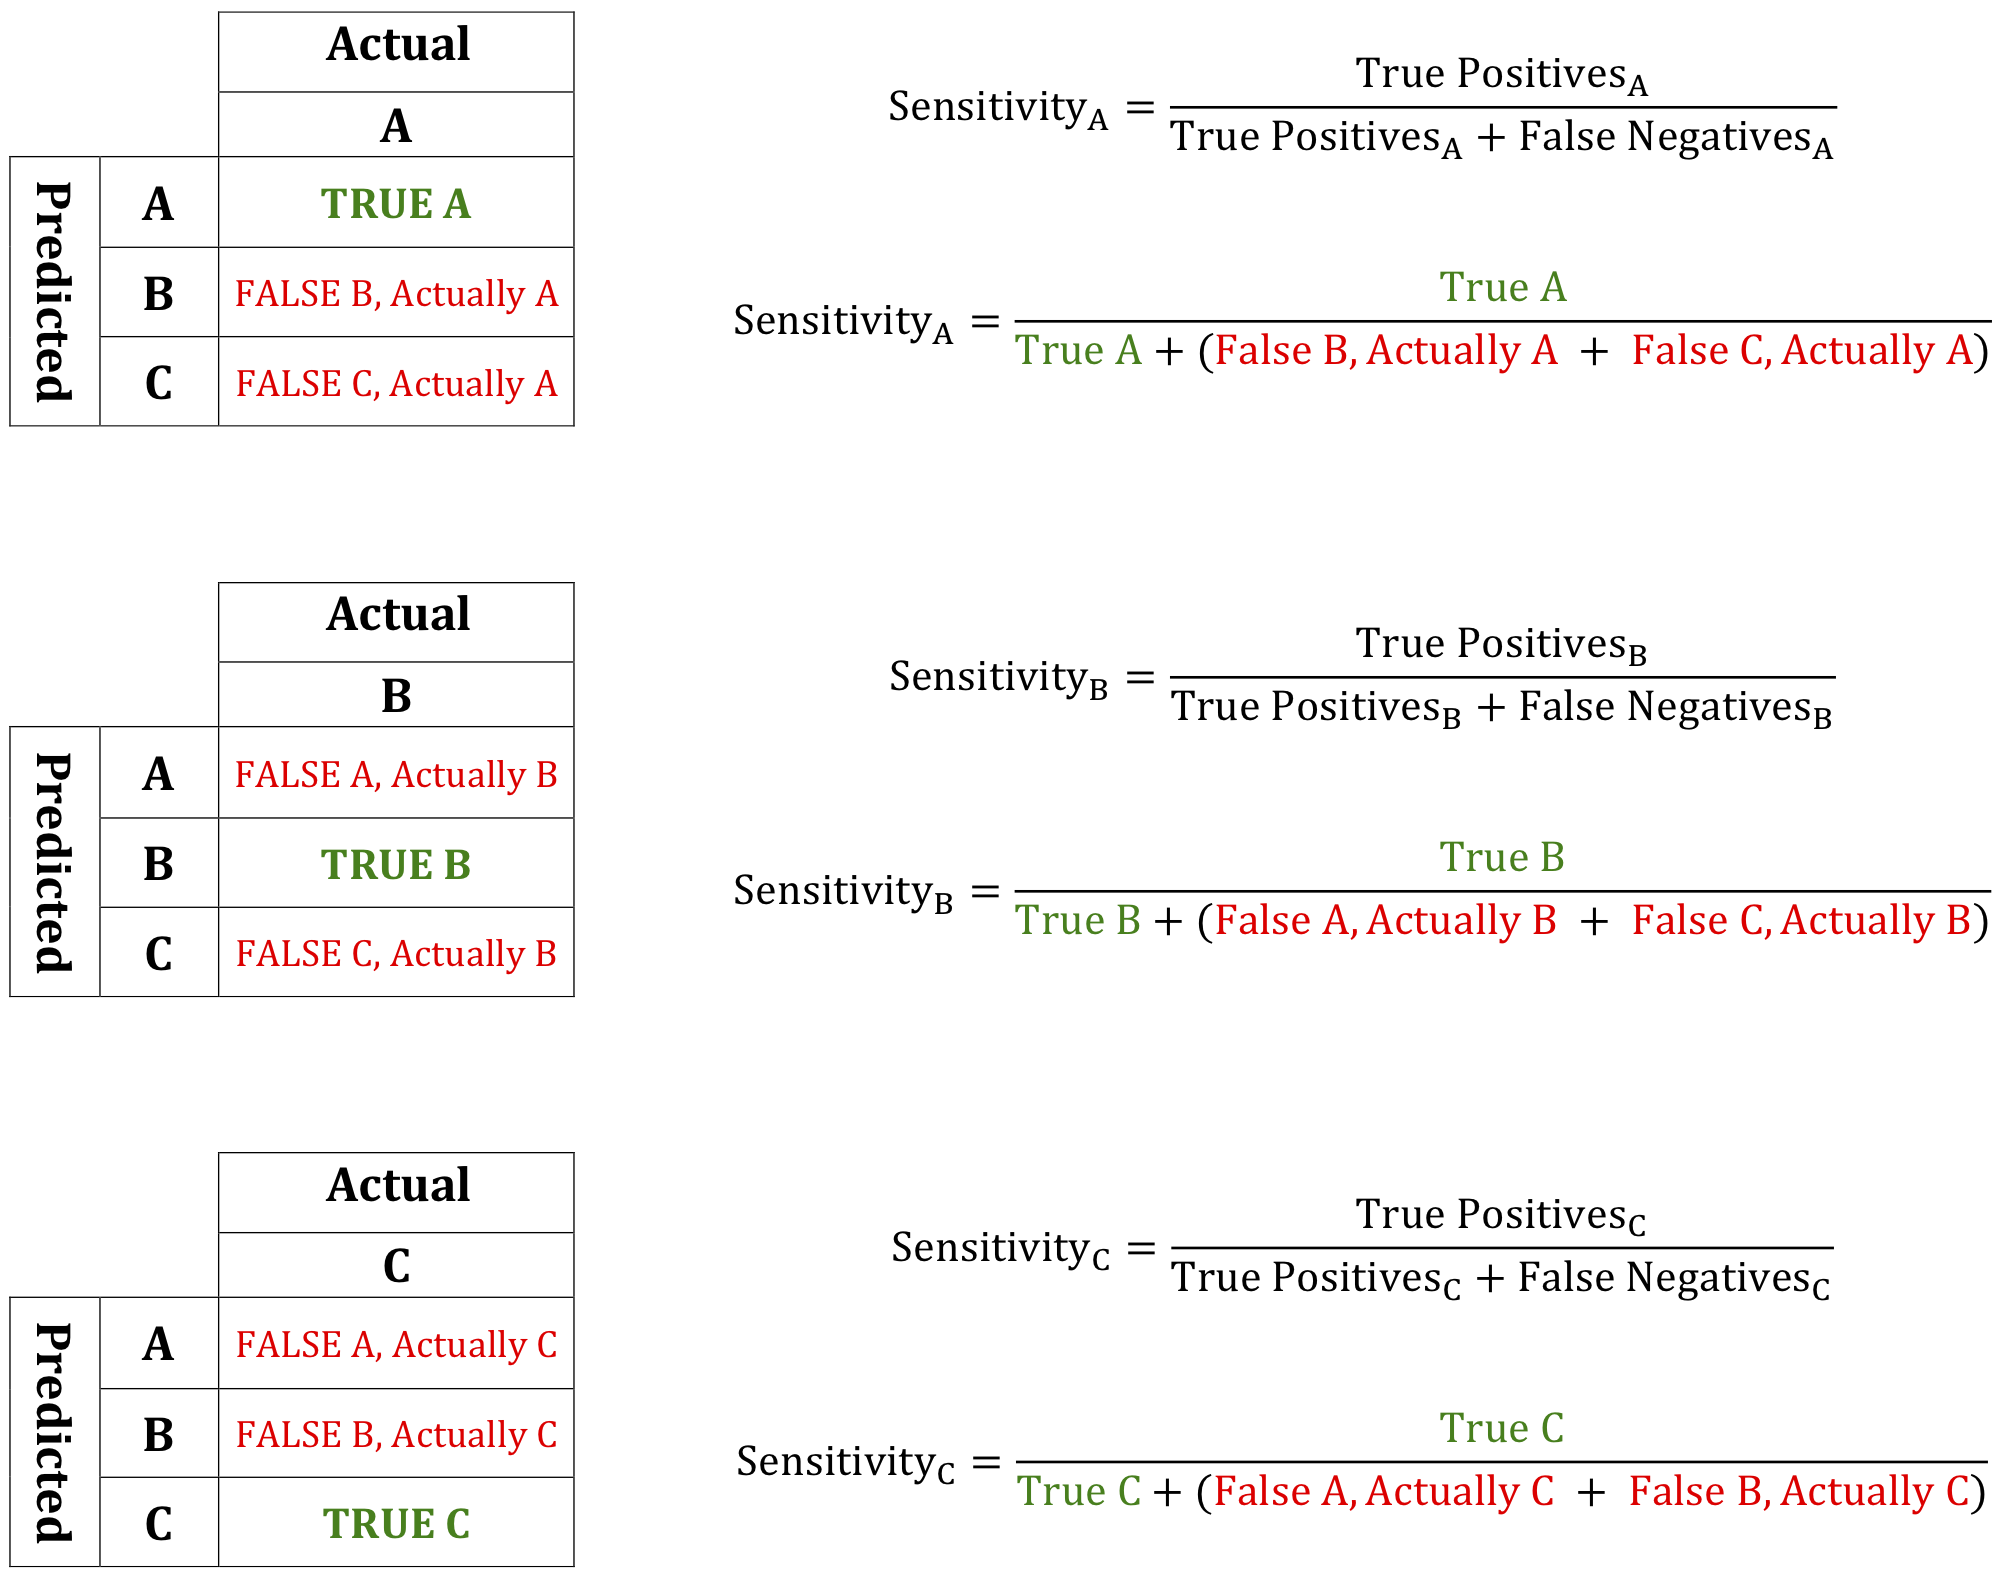

Reference: https://towardsdatascience.com/evaluating-categorical-models-ii-sensitivity-and-specificity-e181e573cff8

## Confusion Matrix in TensorFlow 2.0 Example

###### Library

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

###### Import Fashion MNIST dataset

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [19]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [20]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [21]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

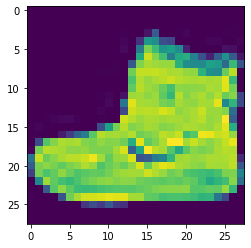

In [22]:
plt.imshow(X_train[0])

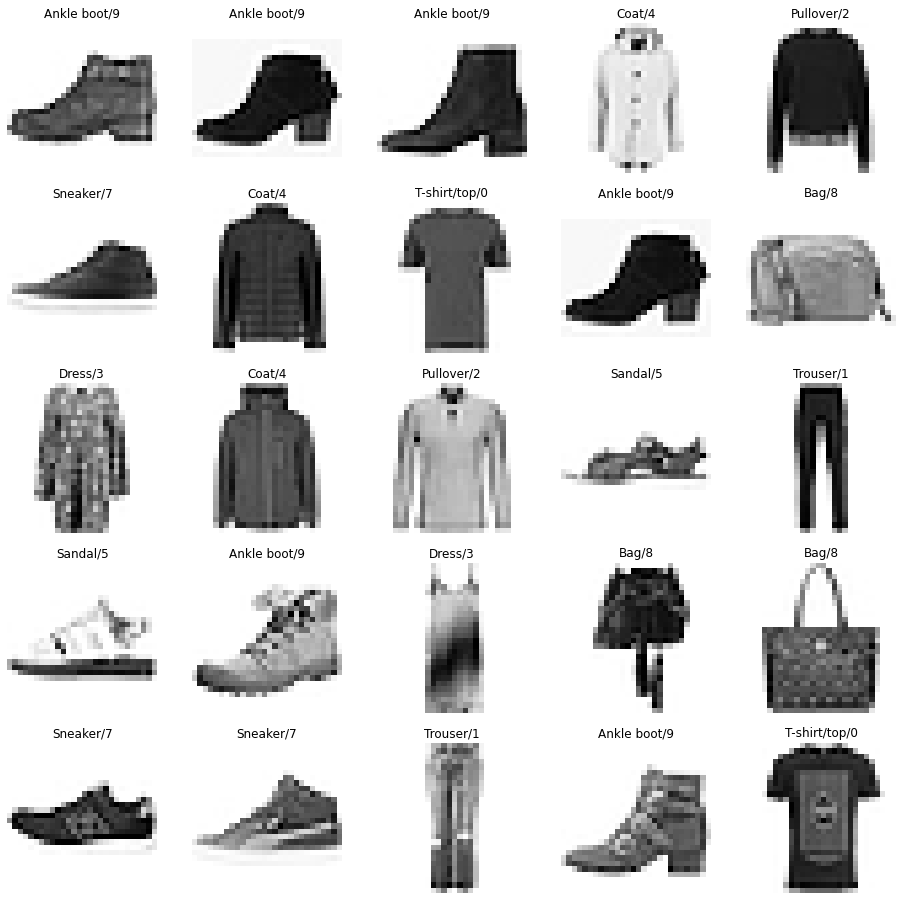

In [23]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title('{}/{}'.format(class_labels[y_train[i]], y_train[i]))

In [24]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [25]:
X_train.ndim

4

In [26]:
X_train.shape

(60000, 28, 28, 1)

In [27]:
X_train = X_train/255
X_test = X_test/255

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 2020 )

In [29]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

##### Build the model

Building the neural network requires configuring the layers of the model, then compliling the model.

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### Train the model

In [52]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 9s 94ms/step - loss: 0.6190 - accuracy: 0.7940 - val_loss: 0.4164 - val_accuracy: 0.8545
Epoch 2/10
94/94 [==============================] - 9s 100ms/step - loss: 0.3790 - accuracy: 0.8675 - val_loss: 0.3597 - val_accuracy: 0.8747
Epoch 3/10
94/94 [==============================] - 9s 99ms/step - loss: 0.3286 - accuracy: 0.8852 - val_loss: 0.3502 - val_accuracy: 0.8759
Epoch 4/10
94/94 [==============================] - 9s 91ms/step - loss: 0.3043 - accuracy: 0.8935 - val_loss: 0.3141 - val_accuracy: 0.8903
Epoch 5/10
94/94 [==============================] - 7s 77ms/step - loss: 0.2813 - accuracy: 0.9010 - val_loss: 0.3064 - val_accuracy: 0.8931
Epoch 6/10
94/94 [==============================] - 8s 81ms/step - loss: 0.2656 - accuracy: 0.9060 - val_loss: 0.2901 - val_accuracy: 0.8986
Epoch 7/10
94/94 [==============================] - 7s 76ms/step - loss: 0.2511 - accuracy: 0.9114 - val_loss: 0.3078 - val_accuracy: 0.8908
Epoch 8/10
9

In [54]:
y_pred= model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.36, 0.1 , 0.  ]], dtype=float32)

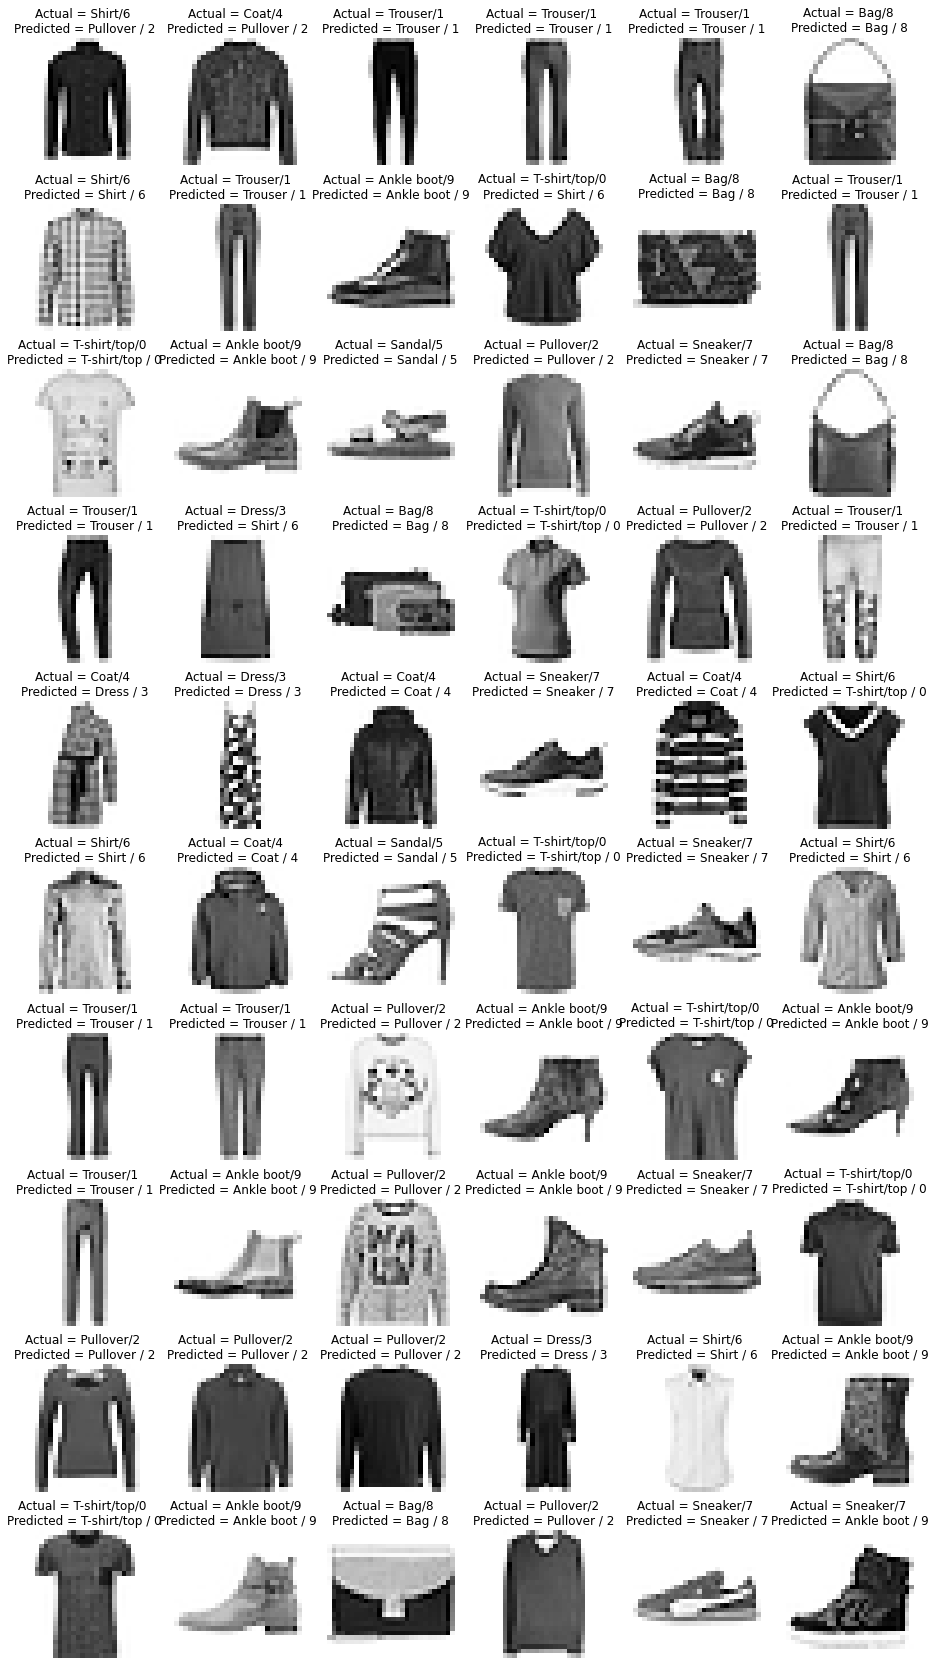

In [55]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j); j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
    plt.title('Actual = {}/{} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

#### Confusion Matrix

<AxesSubplot:>

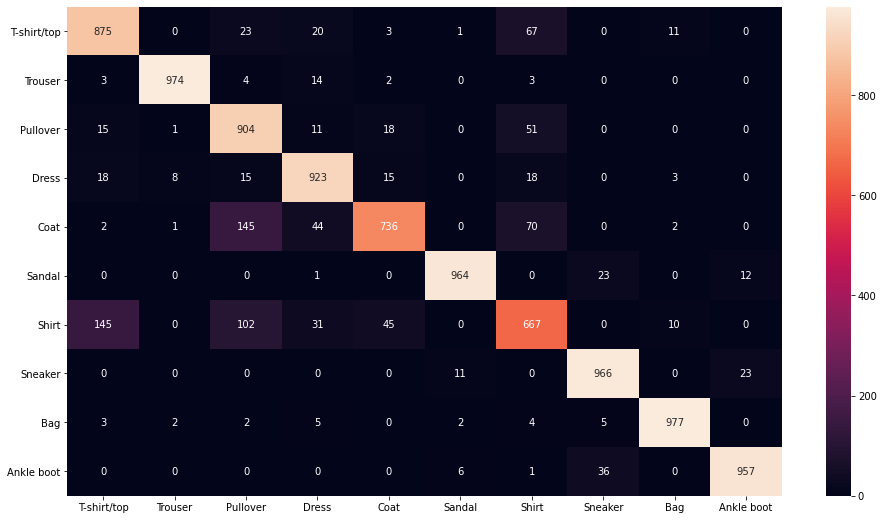

In [56]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Deep Learning

Deep Learning is one of the most important developments in artificial intelligence. Deep Learning is a branch of Machine learning based on a set of algorithms that attempt to model high-level abstractions in data. The development of Deep Learning occurred in parallel with the study of artificial intelligence, and especially with the study of neural networks. In short, Deep algorithms are a set of Artificial Neural Networks (ANNs).


Let's take a look at an example. Assume we want to create a predictive analytics model, such as an animal recognizer, that must solve two problems:

1. Classify if an image represents a cat or a dog
2. Cluster dog and cat images

If we use a typical Machine learning method to solve the first problem, we must define the facial features (ears, eyes, whiskers, and so on) and write a method to determine which features (typically non-linear) are more important when classifying a specific animal.

However, we are unable to address the second issue because traditional Machine Learning algorithms for clustering images (such as K-means) are incapable of handling non-linear features.

After determining which features are the most important for classification or clustering, Deep Learning algorithms will take these two problems a step further and extract the most important features automatically. Using a traditional Machine Learning algorithm, on the other hand, we would have to manually provide the features.

In summary, the Deep Learning workflow would be as follows:

1. When clustering cats or dogs, a Deep Learning algorithm would first identify the most important edges.
2. It would then work backwards from there to find different combinations of shapes and edges.
3. It decides which of these features can be used to classify the animal after successive hierarchical identification of complex concepts and features, then removes the label column and performs unsupervised training with an autoencoder before clustering.

The image is divided into various layers of analysis using Deep Learning techniques. At a lower level, the software examines a grid of a few pixels, for example, with the goal of detecting a color type or various nuances. If it finds something, it informs the next level, which then checks to see if the given color is part of a larger form, such as a line.

In the case of an image classification system, each block extracts the features of the input image gradually and then processes data from previous blocks that have already been processed, extracting increasingly abstract features of the image and thus building the hierarchical representation of data that comes with a Deep Learning-based system.

The layers are build as follows:

Layer 1: The system starts identifying the dark and light pixels

Layer 2: The system identifies edges and shapes

Layer 3: The system learns more complex shapes and objects

Layer 4: The system learns which objects define a human face

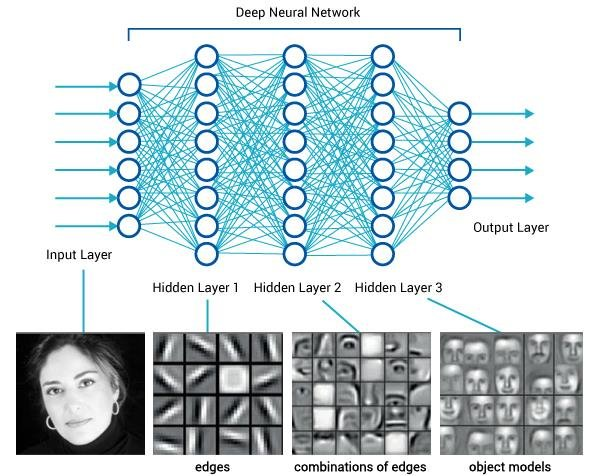

Reference: https://www.researchgate.net/figure/Layers-and-their-abstraction-in-deep-learning-Image-recognition-as-measured-by-ImageNet_fig17_326531654

# Artificial Neural Networks (ANNs)

The concept of Deep Learning is used by ANNs. They're an abstract representation of the human nervous system, which consists of a collection of neurons connected by axons that communicate with one another. The activation function, also known as the transfer function, is applied to the weighted sum of the inputs to calculate the output, or signal that the neuron transmits. The dynamic range of these functions is between -1 and 1, or 0 and 1. In terms of complexity and output, many activation functions differ. We'll go over the three most basic forms here:

1. Step function: The function will return zero or one depending on whether the mathematical sum of the inputs is above or below the threshold value (for example, x = 10).

2. Linear combination: The weighted sum of the input values is subtracted from a default value instead of managing a threshold value. We'll get a binary result, which will be expressed as a positive (+b) or negative (-b) subtraction output.

3. Sigmoid: This results in a sigmoid curve, which has an S-shaped trend. The sigmoid function is frequently used to refer to a special case of the logistic function.

From the simplest forms used in the prototyping of the first artificial neurons, we move to more complex forms that allow greater characterization of the functioning of the neuron:

1. Hyperbolic tangent function
2. Radial basis function
3. Conic section function
4. Softmax function

### ANNs and the backpropagation algorithm

A commonly used supervised learning algorithm is the backpropagation algorithm. The basic steps of the training procedure are as follows:

1. Initialize the net with random weights
2. For all training cases, follow these steps:
    
    -Forward pass: Calculates the network's error, that is, the difference between the desired output and the actual output
    
    -Backward pass: For all layers, starting with the output layer back to input layer:
    
     i. Shows the network layer's output with the correct input (error function).
                    
     ii. Adapts the weights in the current layer to minimize the error function. This is backpropagation' optimization step

# Deep Neural Networks (DNNs)

Artificial Neural Networks with a strong focus on Deep Learning are known as Deep Neural Networks. Such networks are an excellent modelling tool when standard analysis procedures are inapplicable due to the complexity of the data to be processed. Deep Neural Networks are neural networks that are very similar to the ones we've discussed, but they have to implement a more complex model (with a larger number of neurons, hidden layers, and connections), despite adhering to the same learning principles as all Machine Learning problems (such as supervised learning).

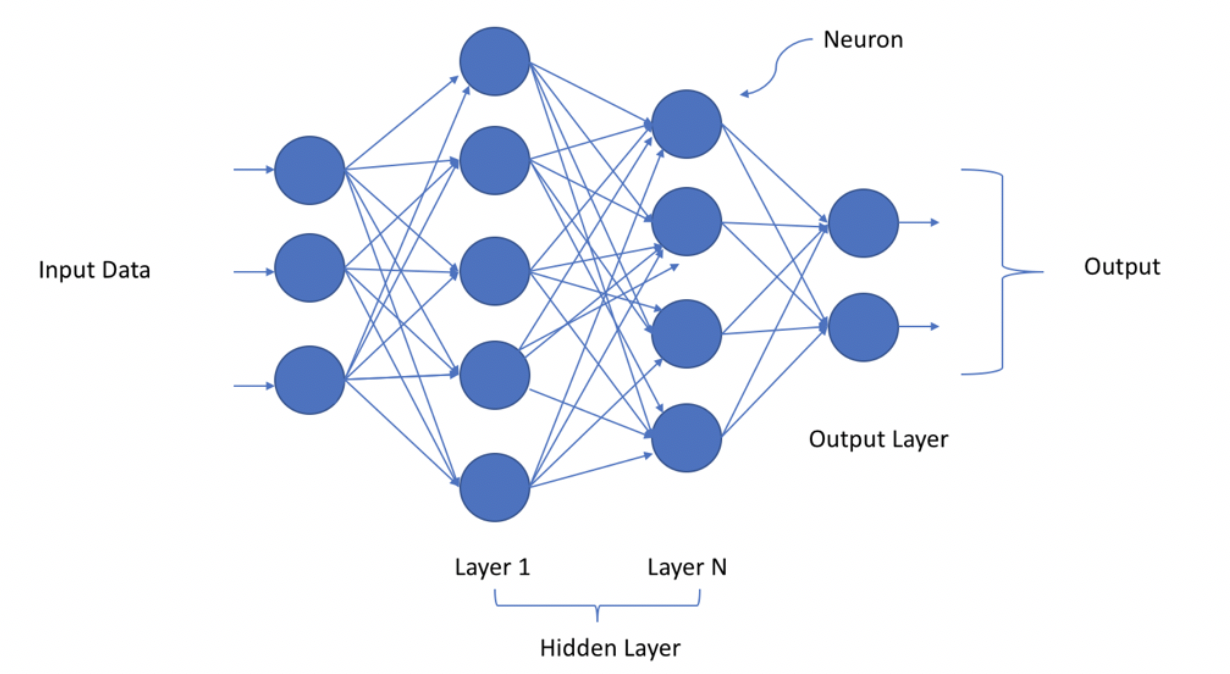

Reference: https://towardsdatascience.com/a-laymans-guide-to-deep-neural-networks-ddcea24847fb

# Reccurrent Neural Networks (RNNs)

The most important feature of an RNN is that it has at least one feedback connection, allowing activations to loop back on themselves. It allows networks to perform temporal processing and learn sequences, such as sequence recognition and reproduction, as well as temporal association and prediction.

RNN architectures come in a variety of shapes and sizes. A standard MLP with additional loops is a common type. These can take advantage of the MLP's powerful non-linear mapping capabilities and have some form of memory. Others have more uniform structures, with every neuron potentially connected to every other neuron, and stochastic activation functions.

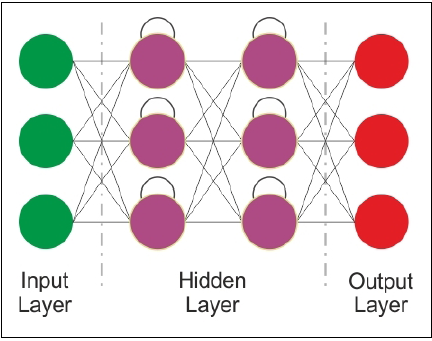

The image above is Reccurrent Neural Networks Architecture. Learning can be accomplished using similar GD procedures to those leading to the backpropagation algorithm for feedforward networks for simple architectures with deterministic activation functions.

# Convolutional Neural Networks (CNNs)

CNNs were created with the goal of image recognition in mind. Each learning image is divided into compact topological portions, each of which will be processed by filters to look for specific patterns. Every sub-portion of an image is represented as a three-dimensional matrix of pixels (width, height, and colour) that can be convolution with the filter set. To put it another way, scrolling through the image computes the inner product of the same filter and input. For each filter, this procedure generates a set of feature maps (activation maps). We get an output volume by superimposing the various feature maps onto the same portion of the image. The convolutional layer is the name for this type of layer.

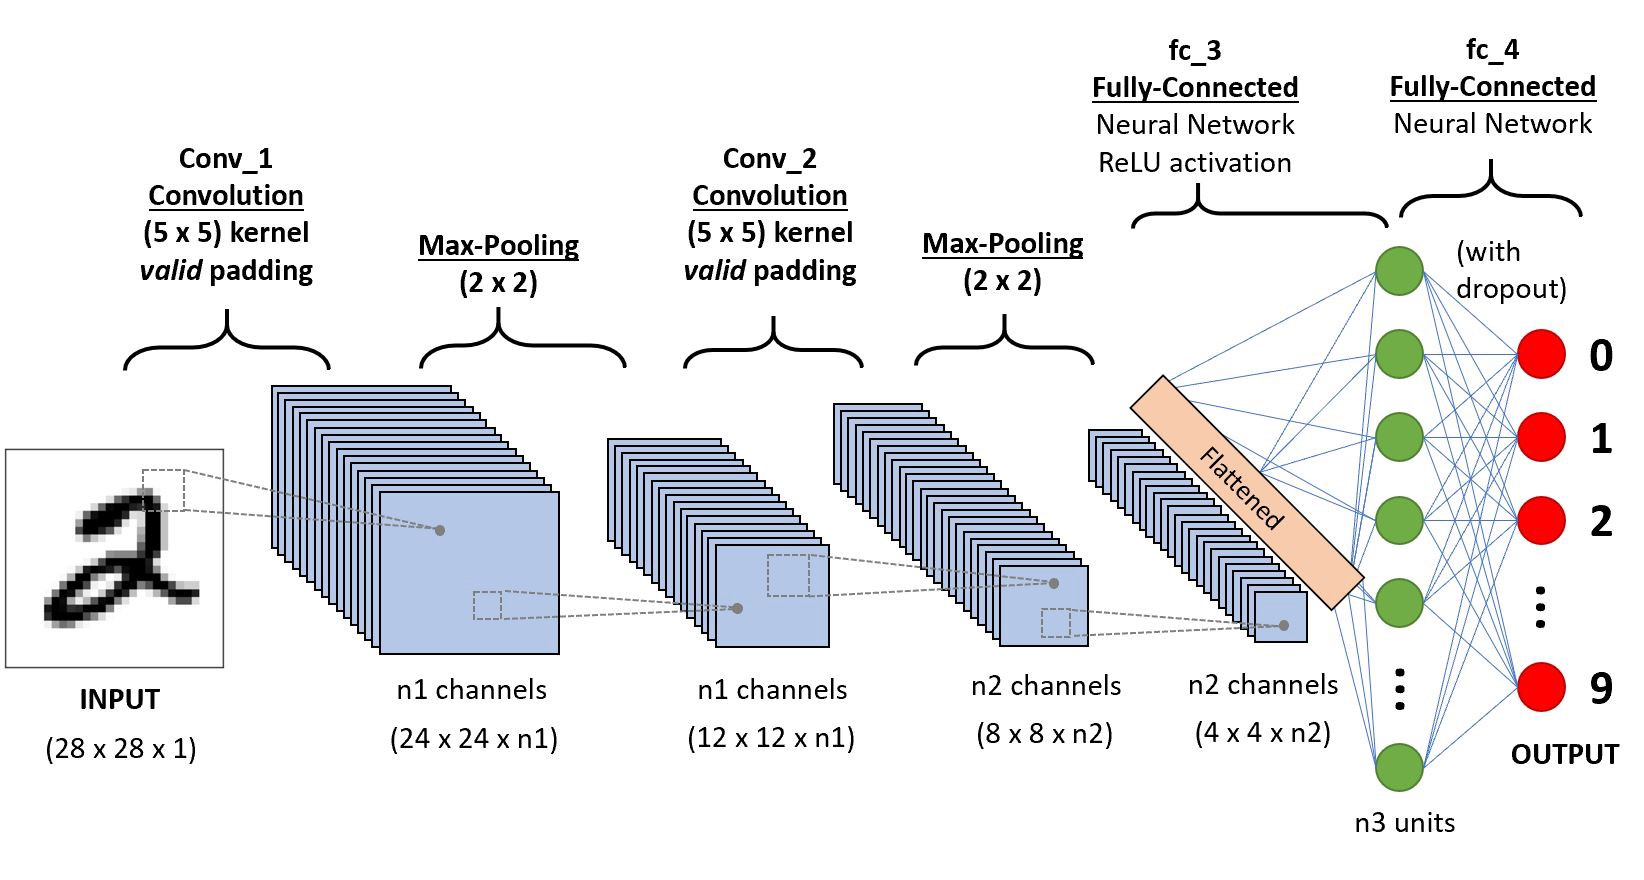

Reference : https://www.analyticsvidhya.com/blog/2020/10/what-is-the-convolutional-neural-network-architecture/

CNNs use partially connected layers to solve this problem. A CNN has far fewer parameters than a fully connected DNN because successive layers are only partially connected and weights are heavily reused. This makes it much faster to train. This reduces the likelihood of overfitting and necessitates significantly less training data. Furthermore, once a CNN has learned a kernel that can detect a specific feature, that feature can be detected anywhere on the image. When a DNN learns a feature in one location, it can only detect that feature in that location. CNNs can generalize much better than DNNs on image processing tasks like classification and use fewer training examples because images typically have very repetitive features.

A CNN works by extracting features from images.
1. Starts with an image
2. Applies many different filters to it to create a feature map
3. Applies a ReLU function to increase non-linearity
4. Applies a pooling layer to each feature map
5. Flattens the pooled images into one long vector.
6. Inputs the vector into a fully connected artificial neural network.
7. Processess the features through the network. The final fully connected layer provides the "voting" of the classes that we're after.
8. Trains through forward propagation and backpropagation for many epochs. This repeats until we have a well-defined neural network with trained weights and feature detectors.

### Convolutional Neural Networks Example using CIFAR10 dataset

In [57]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [58]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

170508288/170498071 [==============================] - 592s 3us/step


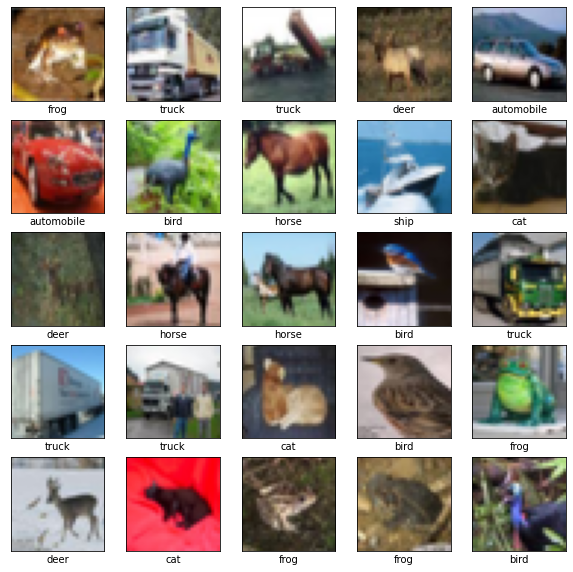

In [59]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##### Create convolutional base

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [65]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10,
                 validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5770 - accuracy: 0.4207 - val_loss: 1.3048 - val_accuracy: 0.5274
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2325 - accuracy: 0.5592 - val_loss: 1.1259 - val_accuracy: 0.5952
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0700 - accuracy: 0.6234 - val_loss: 1.0450 - val_accuracy: 0.6305
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9658 - accuracy: 0.6611 - val_loss: 0.9485 - val_accuracy: 0.6680
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8936 - accuracy: 0.6860 - val_loss: 0.9387 - val_accuracy: 0.6731
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8315 - accuracy: 0.7107 - val_loss: 0.9420 - val_accuracy: 0.6803
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7856 - accuracy: 0.7245 - val_loss: 0.8857 -

###### Evaluate the model

313/313 - 2s - loss: 0.8810 - accuracy: 0.7011


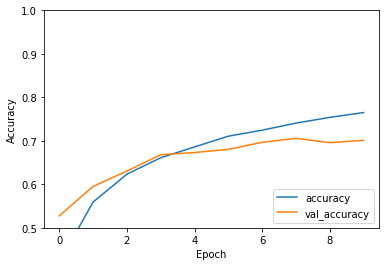

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

#### Coding Reference: https://www.tensorflow.org/tutorials/images/cnn

# Feed-Forward Neural Networks (FFNNs)

An FFNN is made up of many neurons that are organized into layers: one input layer, one or more hidden layers, and one output layer. Each neuron in a layer is connected to every neuron in the previous layer, albeit the connections are not all the same due to differing weights. These connections' weights are used to encode the network's knowledge. Data enters at the inputs and flows layer by layer through the network until it reaches the outputs. There is no feedback between the layers during this operation. As a result, these networks are referred to as feed-forward neural networks.

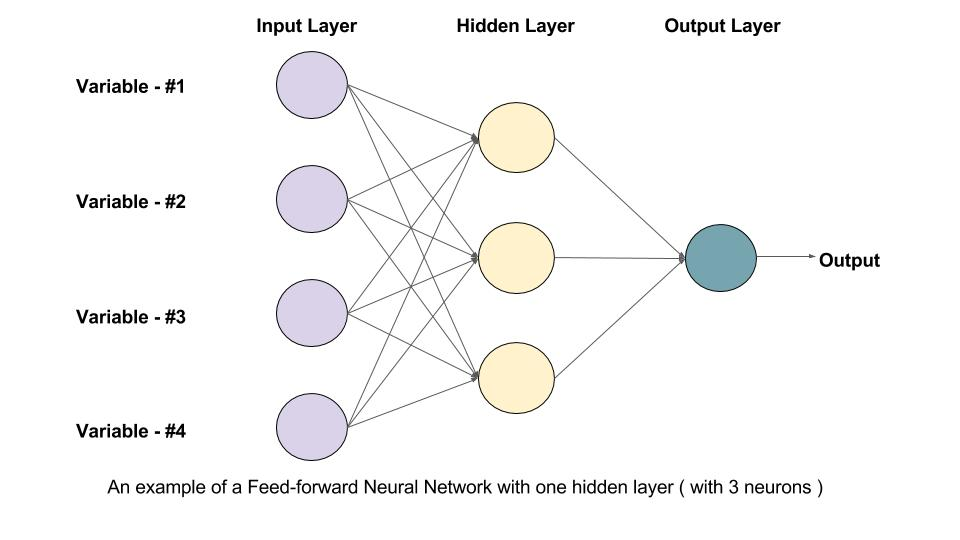

Reference: https://learnopencv.com/understanding-feedforward-neural-networks/

If the neural network architecture contains a small number of hidden layers, or neurons, the network will be unable to approximate an unknown function with sufficient precision, for example. This could be because the backpropagation technique is excessively sophisticated, or because it falls within a local minimum. If the network has a large number of hidden layers, we have an overfitting problem. Regularization using droupout is one answer to this problem.

### Feed-forward and backpropagation

The goal of the backpropagation algorithm is to reduce the difference between the current and desired output. Because the network is feed-forward, activation flows always forward from input units to output units. The gradient of the cost function is backpropagated by changing the weights.

This is a recursive algorithm that can be applied to any number of hidden levels. The inclusion of two phases is critical in such a system. The feed-forward learning models are as follows:

1. Forward pass
2. Backward pass

During the forward pass, we do a number of processes to get forecasts or scores. As a result, for each action in the forward pass, we must draw a graph connecting the operations from top to bottom. The backward pass, on the other hand, is mostly concerned with mathematical operations, such as constructing derivatives for all deferential operations from top to bottom, for all operations in the graph, and then applying them in the chain rule.

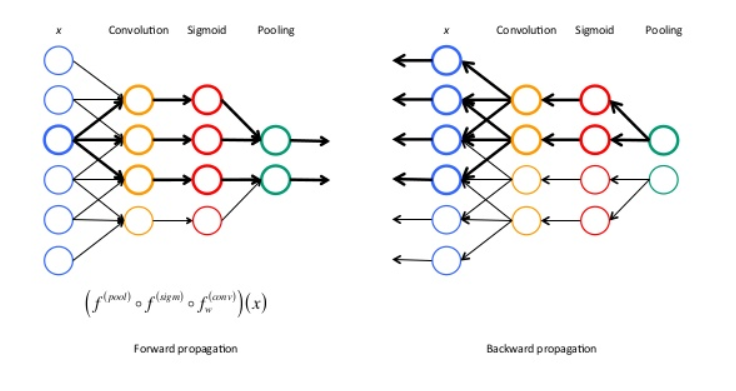

reference: https://medium.com/coinmonks/backpropagation-concept-explained-in-5-levels-of-difficulty-8b220a939db5

### Implementing a feed-forward neural network using MNIST handwritten digits dataset

In [1]:
from keras.datasets import mnist

(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [2]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


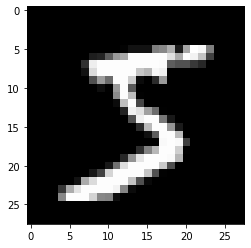

In [9]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0], cmap='gray')
plt.show()

In [4]:
train_target[0]

5

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
________________________________________________

In [13]:
from keras.utils import np_utils

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [14]:
new_train_data=train_data/255.0
new_test_data=test_data/255.0

In [15]:
model.fit(new_train_data,new_train_target, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2100 - accuracy: 0.9367
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0939 - accuracy: 0.9716
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0688 - accuracy: 0.9794
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9848
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0438 - accuracy: 0.9869
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9888
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0257 - accuracy: 0.9924
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

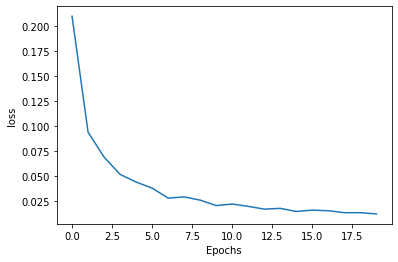

In [16]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

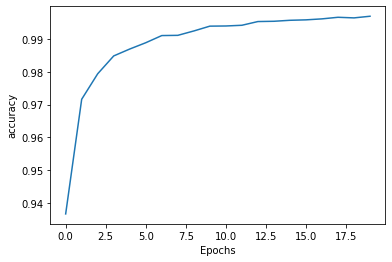

In [17]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [18]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 0s 847us/step - loss: 0.1008 - accuracy: 0.9823


[0.10077005624771118, 0.9822999835014343]

##### Coding Reference: https://github.com/aieml/DLON-Week-02-Practical